In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import walk

import pickle
from matplotlib.ticker import MultipleLocator

val_l = 14340

# Exploration Analysis

In [3]:
fname = "exploration/force_explore.pickle"
with open(fname, 'rb') as handle:
    explore = pickle.load(handle)
    
fname = "exploration/unforce_explore.pickle"
with open(fname, 'rb') as handle:
    unexplore = pickle.load(handle)

In [4]:
explore.head()

,price,reward,inv,portfolio,episode,action,bank,ts
0,0.88773,0.00000,47.0,200.00000,0.0,-47.0,158.27669,0.0
1,0.88788,0.00165,36.0,200.00705,0.0,11.0,168.04337,1.0
2,0.88765,0.00000,97.0,199.99877,0.0,-61.0,113.89672,2.0
3,0.88799,0.01514,44.0,200.03175,0.0,53.0,160.96019,3.0
4,0.88763,0.00000,3.0,200.01591,0.0,41.0,197.35302,4.0


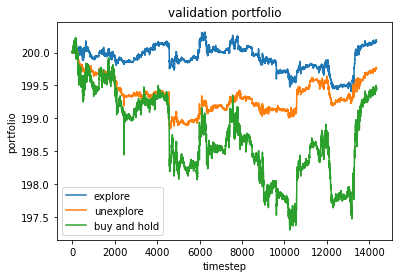

In [5]:
val_explore = explore[explore.episode==-1]
val_unexplore = unexplore[unexplore.episode==-1]

val_l = len(val_explore)

plt.plot(range(val_l), val_explore.portfolio, label='explore')
plt.plot(range(val_l), val_unexplore.portfolio, label='unexplore')

factor = val_explore.portfolio.iloc[0] / val_explore.price.iloc[0]
plt.plot(range(val_l), factor*val_explore.price, label='buy and hold')

plt.title('validation portfolio')
plt.xlabel('timestep')
plt.ylabel('portfolio')
plt.legend()

# Reward Analysis

In [6]:
fname = "reward_positive.pickle"
with open(fname, 'rb') as handle:
    rp = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: 'reward_positive.pickle'

In [ ]:
fname = "reward_percent0.pickle"
with open(fname, 'rb') as handle:
    rp0 = pickle.load(handle)
fname = "reward_percent1.pickle"
with open(fname, 'rb') as handle:
    rp1 = pickle.load(handle)
fname = "reward_percent2.pickle"
with open(fname, 'rb') as handle:
    rp2 = pickle.load(handle)

In [ ]:
val_rp = rp[rp.episode==-1]

plt.plot(range(val_l), val_explore.portfolio, label='face-value reward')
plt.plot(range(val_l), val_rp.portfolio, label='positive reward')
plt.plot(range(val_l), factor*val_explore.price, label='buy and hold')

plt.title('validation portfolio')
plt.xlabel('timestep')
plt.ylabel('portfolio')
plt.legend()

In [ ]:
val_rp0 = rp0[rp0.episode==-1]
val_rp1 = rp1[rp1.episode==-1]
val_rp2 = rp2[rp2.episode==-1]

plt.plot(range(val_l), val_rp0.portfolio, label='0.005')
plt.plot(range(val_l), val_rp1.portfolio, label='0.01')
plt.plot(range(val_l), val_rp2.portfolio, label='0.05')

plt.title('validation portfolio \n reward percentage')
plt.xlabel('timestep')
plt.ylabel('portfolio')
plt.legend()

# Epsilon Decay

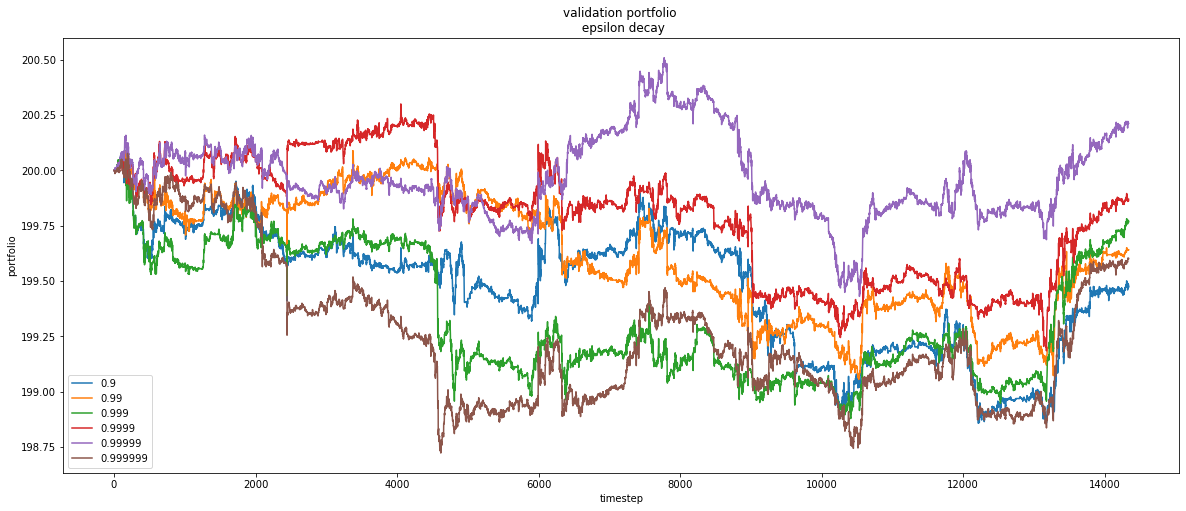

In [7]:
plt.figure(figsize=(20,8))

cols = {'decay', 'ts', 'price', 'inv', 'portfolio', 'action', 'episode', 'bank', 'reward'}
decay_df = pd.DataFrame(columns=cols)
decay_label = '0.9'

for n in range(6):
    fname = 'rl_params/decay'+str(n)+'.pickle'
    with open(fname, 'rb') as handle:
        ed0 = pickle.load(handle)
    
    val_ed0 = ed0[ed0.episode==-1]
    plt.plot(range(val_l), val_ed0.portfolio, label=decay_label)
    
    decay_label += '9'

plt.title('validation portfolio \n epsilon decay')
plt.xlabel('timestep')
plt.ylabel('portfolio')
plt.legend()

## Max Timestep in Experience Replay

In [ ]:
plt.figure(figsize=(20,8))


fname = 'rl_params/decay4.pickle'
with open(fname, 'rb') as handle:
    ed0 = pickle.load(handle)
val_ed0 = ed0[ed0.episode==-1]
plt.plot(range(val_l), val_ed0.portfolio, label='200')


#labels = [500,1000,2000,5000]
for n in range(4):
    fname = 'rl_params/max_ts'+str(n)+'.pickle'
    with open(fname, 'rb') as handle:
        ed0 = pickle.load(handle)
    
    val_ed0 = ed0[ed0.episode==-1]
    plt.plot(range(val_l), val_ed0.portfolio, label=val_ed0.max_ts.unique()[0])
    

plt.title('validation portfolio \n max_ts')
plt.xlabel('timestep')
plt.ylabel('portfolio')
plt.legend()

## Window Size

In [ ]:
plt.figure(figsize=(20,8))

for n in range(6):
    fname = 'rl_params/window'+str(n)+'.pickle'
    with open(fname, 'rb') as handle:
        ed0 = pickle.load(handle)
    
    val_ed0 = ed0[ed0.episode==-1]
    plt.plot(range(val_l), val_ed0.portfolio, label=val_ed0.window.unique()[0])
    

plt.title('validation portfolio \n window size')
plt.xlabel('timestep')
plt.ylabel('portfolio')
plt.legend()

## DQN ANN

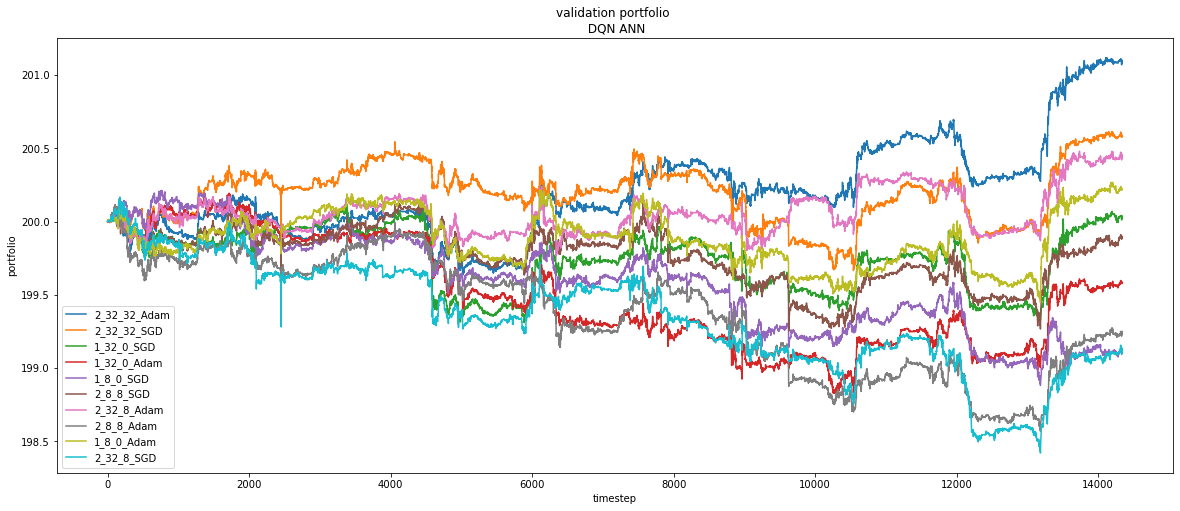

In [19]:
mypath = 'DQN_ANN/stats'
_, _, filenames = next(walk(mypath))

plt.figure(figsize=(20,8))

portfolios = pd.DataFrame(columns=['name', 'avg'])

for fname in filenames[1:]:
    with open(mypath+'/'+fname, 'rb') as handle:
        ed0 = pickle.load(handle)
    
    name = fname[:-7]
    val_ed0 = ed0[ed0.episode==-1]
    plt.plot(range(val_l), val_ed0.portfolio, label=name)
    
    portfolios = portfolios.append({'name':name, 'avg':val_ed0.portfolio.mean()}, ignore_index=True)
    
    
plt.title('validation portfolio \n DQN ANN')
plt.xlabel('timestep')
plt.ylabel('portfolio')
plt.legend()

# DQN_CNN

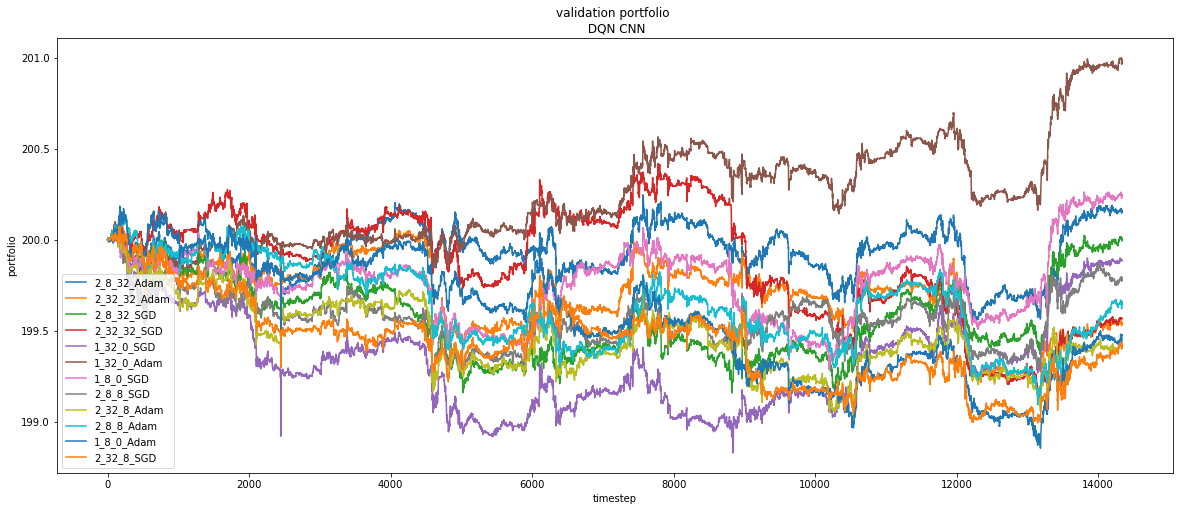

In [4]:
mypath = 'DQN_CNN/train/stats'
_, _, filenames = next(walk(mypath))

plt.figure(figsize=(20,8))

portfolios = pd.DataFrame(columns=['name', 'avg'])

for fname in filenames[1:]:
    with open(mypath+'/'+fname, 'rb') as handle:
        ed0 = pickle.load(handle)
    
    name = fname[:-7]
    val_ed0 = ed0[ed0.episode==-1]
    #val_l = len(val_ed0)
    plt.plot(range(val_l), val_ed0.portfolio, label=name)
    
    portfolios = portfolios.append({'name':name, 'avg':val_ed0.portfolio.mean()}, ignore_index=True)
    
    
plt.title('validation portfolio \n DQN CNN')
plt.xlabel('timestep')
plt.ylabel('portfolio')
plt.legend()

# DQN_RNN

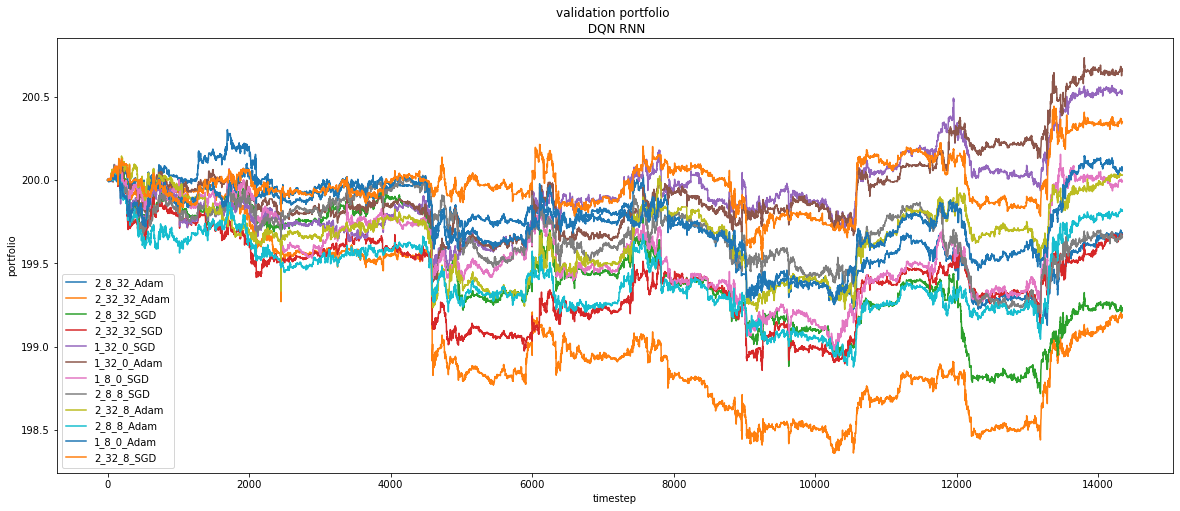

In [2]:
mypath = 'DQN_RNN/train/stats'
_, _, filenames = next(walk(mypath))

plt.figure(figsize=(20,8))

portfolios = pd.DataFrame(columns=['name', 'avg'])

for fname in filenames[1:]:
    with open(mypath+'/'+fname, 'rb') as handle:
        ed0 = pickle.load(handle)
    
    name = fname[:-7]
    val_ed0 = ed0[ed0.episode==-1]
    plt.plot(range(val_l), val_ed0.portfolio, label=name)
    
    portfolios = portfolios.append({'name':name, 'avg':val_ed0.portfolio.mean()}, ignore_index=True)
    
    
plt.title('validation portfolio \n DQN RNN')
plt.xlabel('timestep')
plt.ylabel('portfolio')
plt.legend()

In [9]:
portfolios.sort_values(by='avg', ascending=False)

,name,avg
11,2_32_8_SGD,199.980710
5,1_32_0_Adam,199.937672
4,1_32_0_SGD,199.921408
10,1_8_0_Adam,199.760765
0,2_8_32_Adam,199.719715
7,2_8_8_SGD,199.680302
8,2_32_8_Adam,199.668109
6,1_8_0_SGD,199.580579
2,2_8_32_SGD,199.435915
9,2_8_8_Adam,199.415058


## Comparison of all DQN Variations 

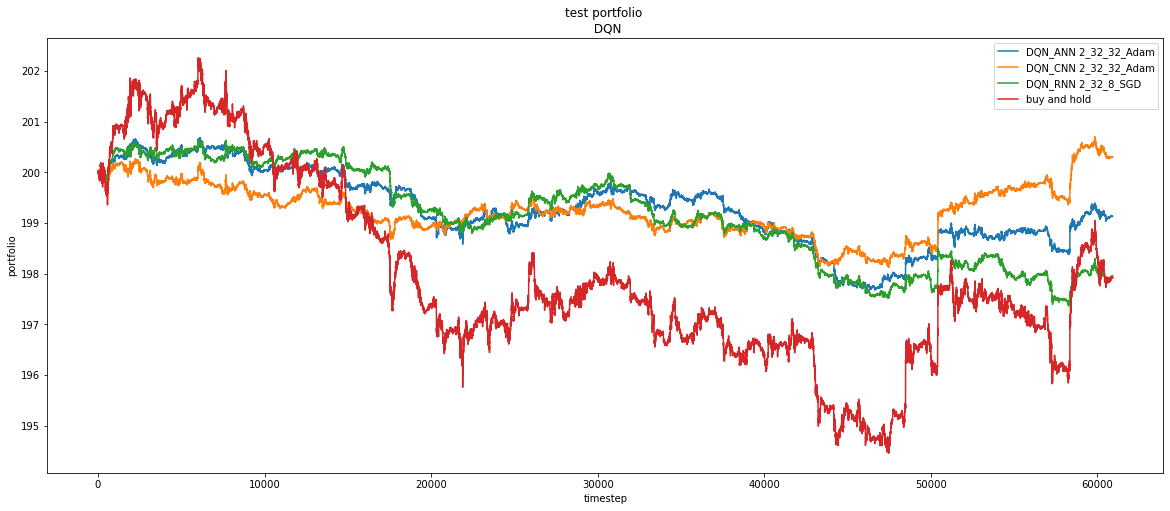

In [10]:
plt.figure(figsize=(20,8))

# DQN ANN
fname = 'DQN_ANN/test/stats/2_32_32_Adam.pickle'
with open(fname, 'rb') as handle:
    ed0 = pickle.load(handle)
ts = range(len(ed0))
plt.plot(ts, ed0.portfolio, label='DQN_ANN 2_32_32_Adam')

# DQN CNN
fname = 'DQN_CNN/test/stats/1_32_0_Adam.pickle'
with open(fname, 'rb') as handle:
    ed0 = pickle.load(handle)
plt.plot(ts, ed0.portfolio, label='DQN_CNN 2_32_32_Adam')

# DQN RNN
fname = 'DQN_RNN/test/stats/2_32_8_SGD.pickle'
with open(fname, 'rb') as handle:
    ed0 = pickle.load(handle)
plt.plot(ts, ed0.portfolio, label='DQN_RNN 2_32_8_SGD')

# BUY AND HOLD
factor = ed0.portfolio.iloc[0] / ed0.price.iloc[0]
plt.plot(ts, factor*ed0.price, label='buy and hold')
    

plt.title('test portfolio \n DQN')
plt.xlabel('timestep')
plt.ylabel('portfolio')
plt.legend()